Downloading and installing necessary packages

In [ ]:
!pip install osm-flex
!pip install osmosis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 5.4 MB/s eta 0:00:00
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (24.6 MB)
Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (883 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211.5

https://www.cazahar.com/en/ontdek-spanje-alle-autonome-regios-en-hun-hoofdsteden/

In [ ]:
# Loading necessary data packages
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

# Importing necessary libraries
# sys.path.append('') #'your-path-to/osm-flex/src'

import osm_flex
import osm_flex.download as dl
import osm_flex.extract as ex
import osm_flex.config
import osm_flex.clip as cp

osm_flex.enable_logs()

1. Using the OSM Flex package to download the Road Network for Spain

In [ ]:
# Download the Spain country file from download.geofabrik.de
# Saving the reprojected raster to a new file
iso3 = 'ESP'
path_esp_dump = dl.get_country_geofabrik(iso3)
print(f'Saved as {path_esp_dump}')

INFO:osm_flex.download:Download file: /root/osm/osm_bpf/spain-latest.osm.pbf


Saved as /root/osm/osm_bpf/spain-latest.osm.pbf


In [ ]:
# available dictionary keys:
osm_flex.config.DICT_CIS_OSM.keys()

dict_keys(['education', 'healthcare', 'water', 'telecom', 'road', 'main_road', 'rail', 'air', 'gas', 'oil', 'power', 'wastewater', 'food', 'buildings'])

In [ ]:
# Convert the osm_flex CI dictionary into a Pandas DataFrame for easier exploration of the available CI keys (categories).
DICT_CIS_OSM = pd.DataFrame(osm_flex.config.DICT_CIS_OSM)

# Display the first few rows of the DataFrame to preview its structure and the CI keys it contains.
DICT_CIS_OSM.head()

,education,healthcare,water,telecom,road,main_road,rail,air,gas,oil,power,wastewater,food,buildings
osm_keys,"[amenity, building, name]","[amenity, building, healthcare, name]","[man_made, pump, pipeline, emergency, name]","[man_made, tower_type, telecom, communication_...","[highway, name, maxspeed, lanes, surface]","[highway, name, maxspeed, lanes, surface]","[railway, name, gauge, electrified, voltage]","[aeroway, name]","[man_made, pipeline, utility, name]","[pipeline, man_made, amenity, name]","[power, voltage, utility, name]","[reservoir_type, man_made, utility, natural, n...","[shop, name]","[building, amenity, name]"
osm_query,building='school' or amenity='school' or\n ...,amenity='hospital' or healthcare='hospital' or...,man_made='water_well' or man_made='water_works...,tower_type='communication' or man_made='mast' ...,"highway in ('motorway', 'motorway_link', 'trun...","highway in ('primary', 'primary_link', 'second...",railway='rail' or railway='tram' or\n ...,aeroway='aerodrome',(man_made='pipeline' and substance='gas') or\n...,(pipeline='substation' and substance='oil') or...,power='line' or power='cable' or\n ...,reservoir_type='sewage' or\n ...,shop='supermarket' or shop='greengrocer' or\n ...,building='yes' or building='house' or \n ...


In [ ]:
gdf_esp_mainroad = ex.extract_cis(path_esp_dump, 'main_road')

# Drop rows where geometry type is not LineString
gdf_esp_mainroad = gdf_esp_mainroad[gdf_esp_mainroad.geometry.geom_type == 'LineString']

INFO:osm_flex.extract:query is finished, lets start the loop
extract points: 0it [00:33, ?it/s]
INFO:osm_flex.extract:query is finished, lets start the loop
extract multipolygons: 100%|██████████| 3/3 [02:56<00:00, 58.97s/it]
INFO:osm_flex.extract:query is finished, lets start the loop
extract lines: 100%|██████████| 656796/656796 [01:58<00:00, 5563.80it/s] 


2. Obtaining Regions

In [ ]:
# Obtain the region polygons
admin_1_esp = cp.get_admin1_shapes('ESP')
admin_1_esp.keys()

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


dict_keys(['Ceuta', 'Melilla', 'Navarre', 'Gipuzkoa', 'Huesca', 'Lleida', 'Girona', 'Badajoz', 'Cádiz', 'Ourense', 'Cáceres', 'Salamanca', 'Zamora', 'Pontevedra', 'Huelva', 'Barcelona', 'Tarragona', 'Castellón', 'Valencia', 'Alicante', 'Murcia', 'Almería', 'Granada', 'Málaga', 'Seville', 'A Coruña', 'Lugo', 'Asturias', 'Cantabria', 'Biscay', 'Santa Cruz de Tenerife', 'Las Palmas', 'Balearic Islands', 'Zaragoza', 'La Rioja', 'Araba / Álava', 'Albacete', 'Teruel', 'Cuenca', 'Toledo', 'León', 'Soria', 'Burgos', 'Ávila', 'Palencia', 'Ciudad Real', 'Córdoba', 'Guadalajara', 'Jaén', 'Community of Madrid', 'Segovia', 'Valladolid'])

3. Plot Completeness per Autonomous Region Capital

INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while
INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while
INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while
INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while
INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
        

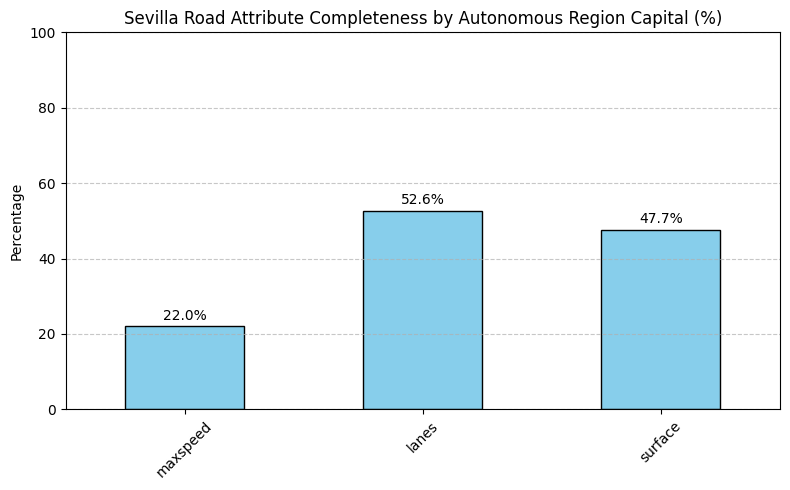

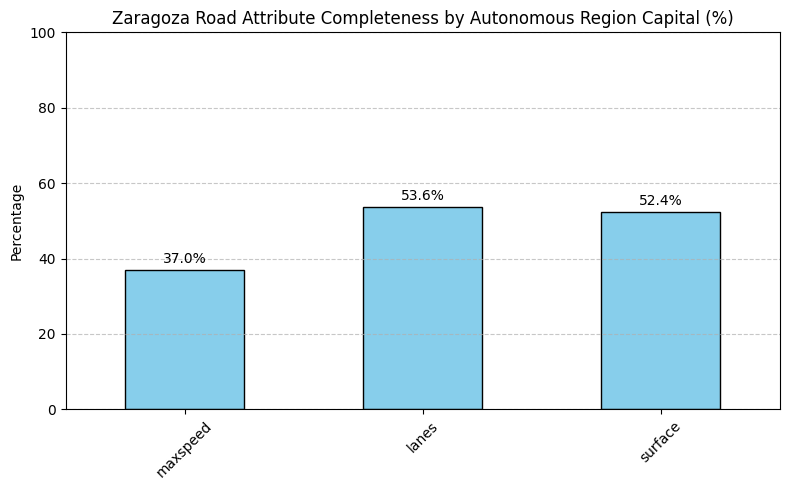

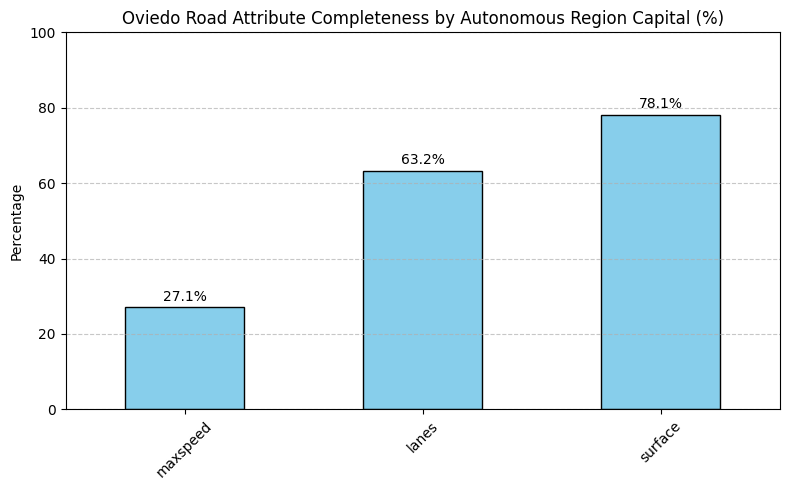

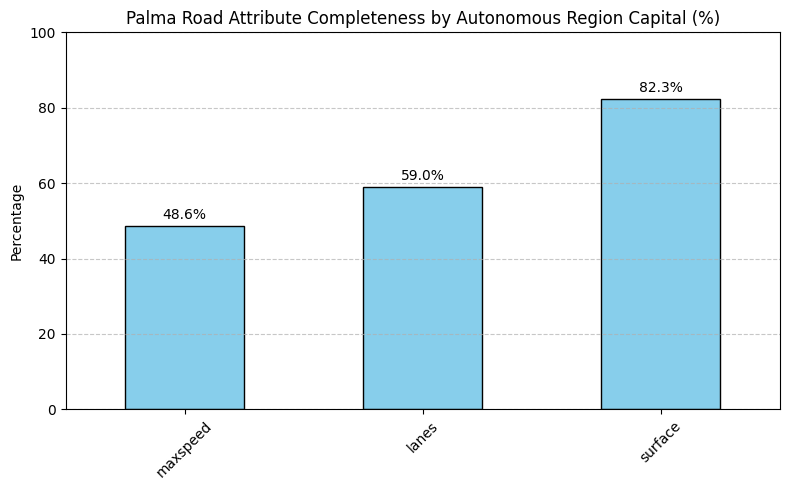

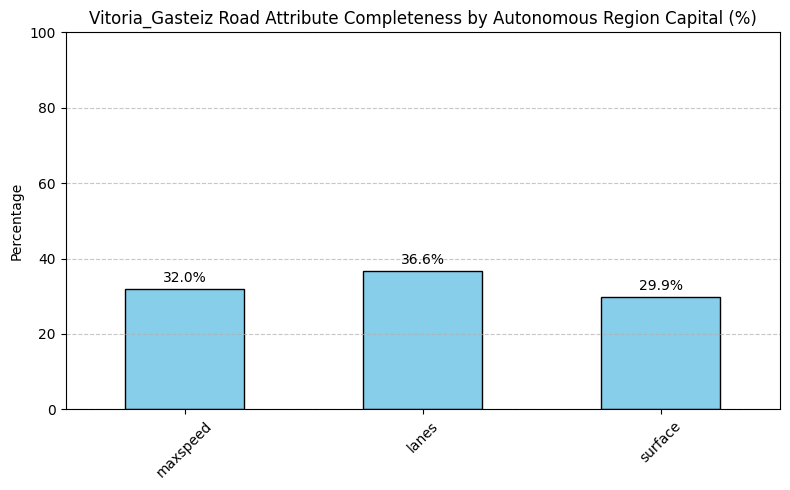

Skipping Las_Palmas — no road data found.


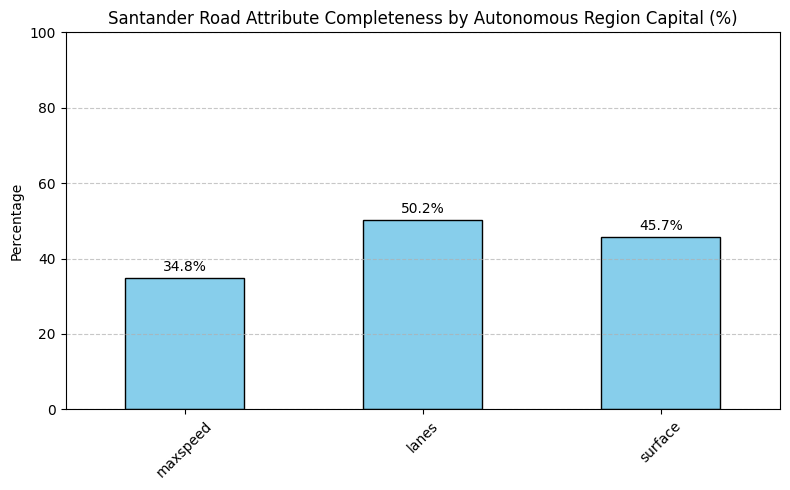

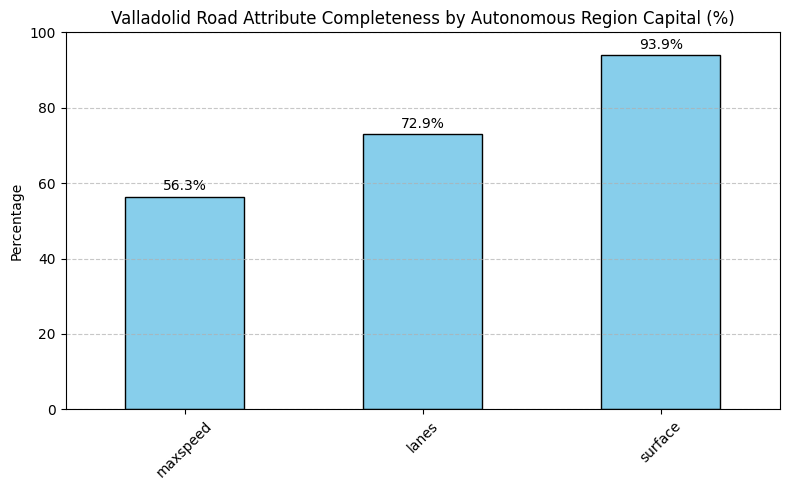

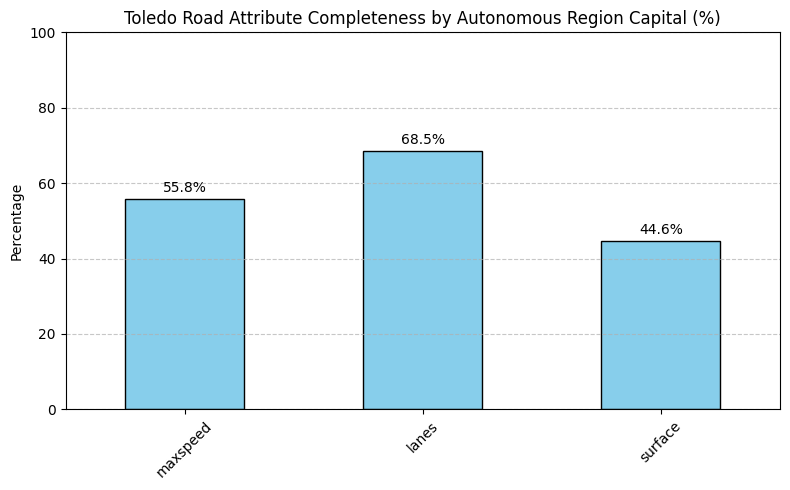

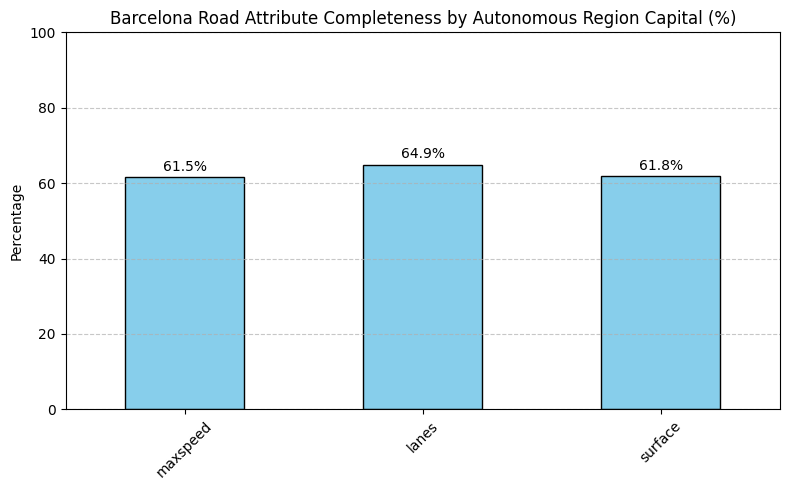

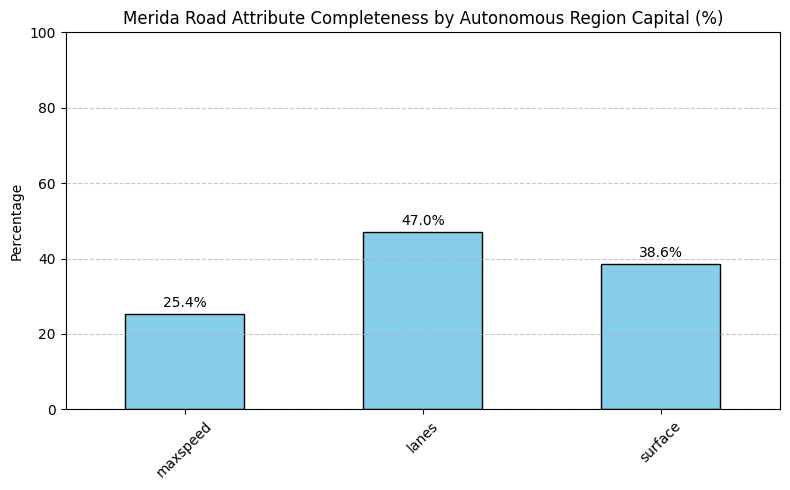

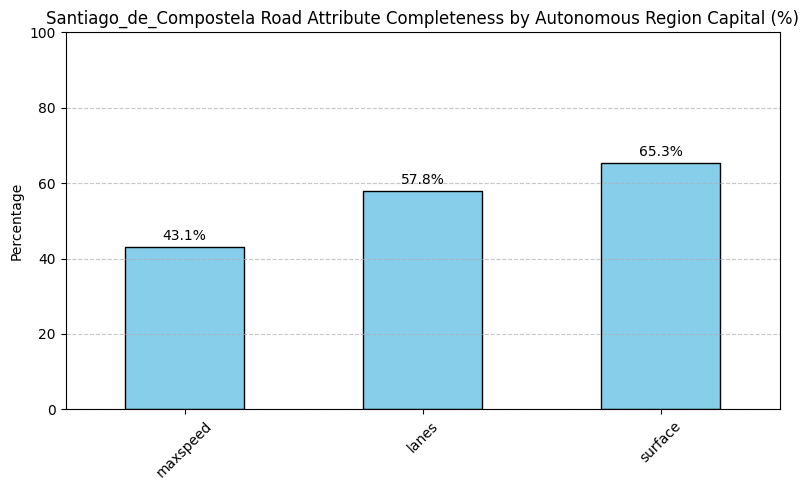

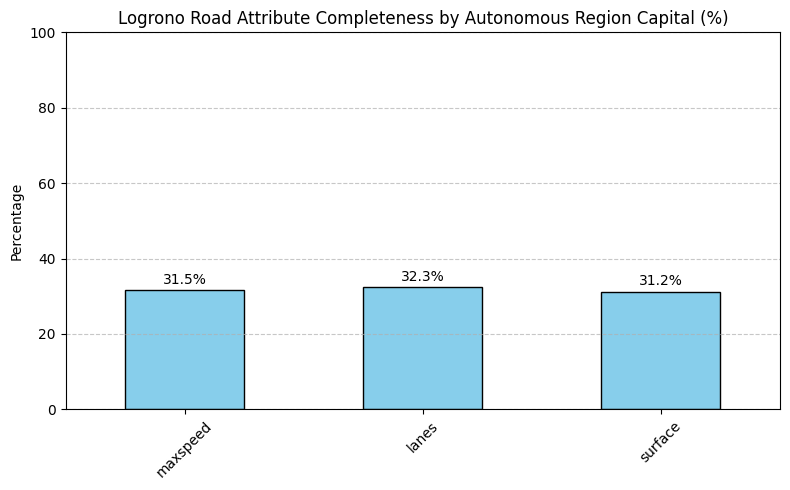

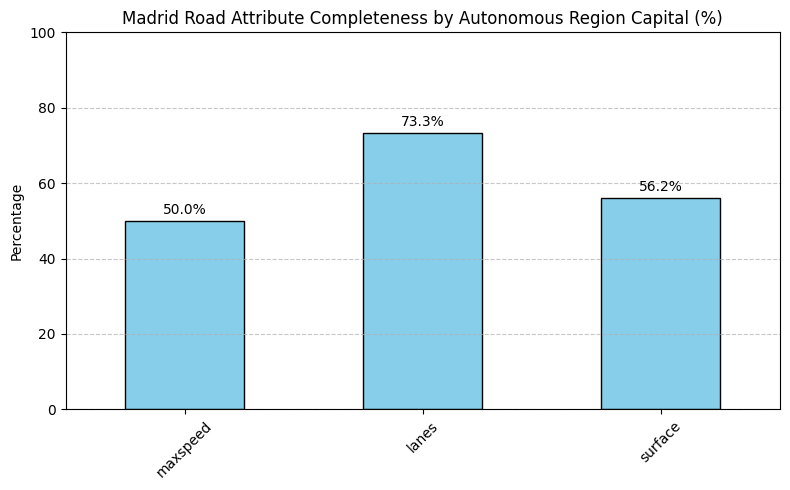

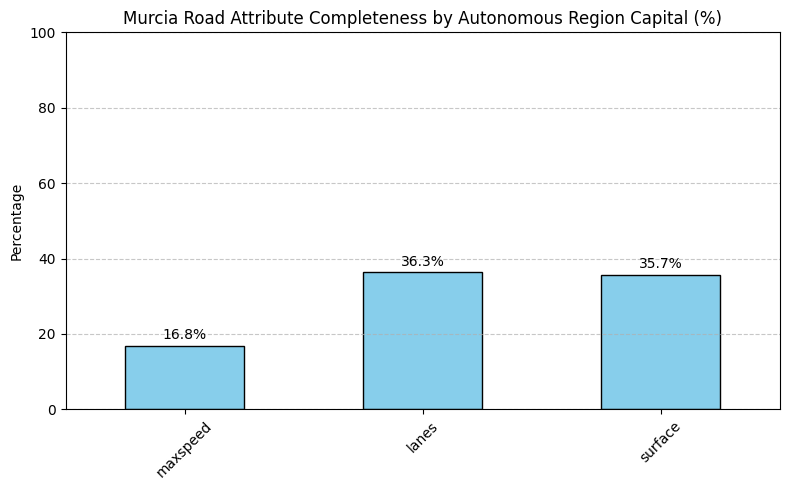

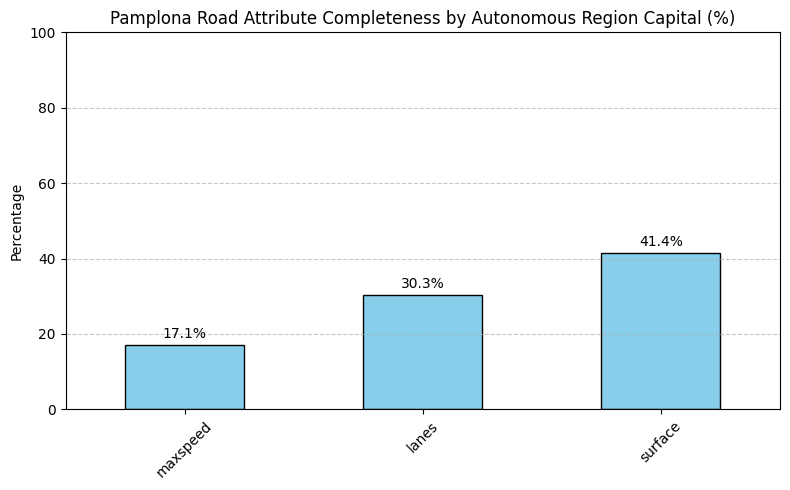

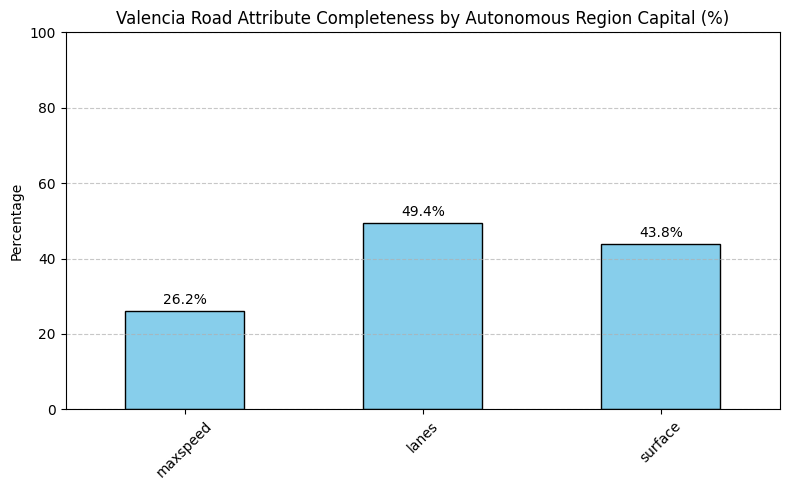

In [ ]:
# --- Step 1: Define the regions dictionary (mapping names to shapes) ---
regions = {
    "Sevilla": admin_1_esp['Seville'],
    "Zaragoza": admin_1_esp['Zaragoza'],
    "Oviedo": admin_1_esp['Asturias'],
    "Palma": admin_1_esp['Balearic Islands'],
    "Vitoria_Gasteiz": admin_1_esp['Araba / Álava'],
    "Las_Palmas": admin_1_esp['Las Palmas'],
    "Santander": admin_1_esp['Cantabria'],
    "Valladolid": admin_1_esp['Valladolid'],
    "Toledo": admin_1_esp['Toledo'],
    "Barcelona": admin_1_esp['Barcelona'],
    "Merida": admin_1_esp['Badajoz'],
    "Santiago_de_Compostela": admin_1_esp['A Coruña'],
    "Logrono": admin_1_esp['La Rioja'],
    "Madrid": admin_1_esp['Community of Madrid'],
    "Murcia": admin_1_esp['Murcia'],
    "Pamplona": admin_1_esp['Navarre'],
    "Valencia": admin_1_esp['Valencia']
}

# --- Step 2: Clip the OSM data for each region ---
for name, shp in regions.items():
    cp.clip_from_shapes(
        [shp],
        osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath(f"{name}.osm.pbf"),
        osmpbf_clip_from=path_esp_dump,
        kernel='osmosis',
        overwrite=True
    )

# --- Step 3: Extract road networks from the main roads GeoDataFrame ---
roadnetworks = {}
for name, shp in regions.items():
    roadnetworks[f"{name}_Roadnetwork"] = gdf_esp_mainroad[gdf_esp_mainroad.intersects(shp)]

# --- Step 4: Analyze attribute completeness and plot results ---
summary_data = {}

for city_name in regions.keys():
    df_city = roadnetworks[f"{city_name}_Roadnetwork"].copy()
    if df_city.empty:
        print(f"Skipping {city_name} — no road data found.")
        continue

    # Assign ID index
    df_city['ID'] = pd.RangeIndex(start=1, stop=len(df_city) + 1)
    df_city = df_city.set_index('ID')

    # Check for expected columns
    available_cols = [col for col in ['maxspeed', 'lanes', 'surface'] if col in df_city.columns]
    if not available_cols:
        print(f"Skipping {city_name} — no expected attributes found.")
        continue

    # Calculate completeness %
    completeness = df_city[available_cols].notnull().mean() * 100
    summary_data[city_name] = completeness

    # Plot
    plt.figure(figsize=(8, 5))
    completeness.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{city_name} Road Attribute Completeness (%)')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for idx, val in enumerate(completeness):
        plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


3. Summarize Results

In [ ]:
summary_df = pd.DataFrame(summary_data).T.fillna(0)
print(summary_df.round(1))

                        maxspeed  lanes  surface
Sevilla                     22.0   52.6     47.7
Zaragoza                    37.0   53.6     52.4
Oviedo                      27.1   63.2     78.1
Palma                       48.6   59.0     82.3
Vitoria_Gasteiz             32.0   36.6     29.9
Santander                   34.8   50.2     45.7
Valladolid                  56.3   72.9     93.9
Toledo                      55.8   68.5     44.6
Barcelona                   61.5   64.9     61.8
Merida                      25.4   47.0     38.6
Santiago_de_Compostela      43.1   57.8     65.3
Logrono                     31.5   32.3     31.2
Madrid                      50.0   73.3     56.2
Murcia                      16.8   36.3     35.7
Pamplona                    17.1   30.3     41.4
Valencia                    26.2   49.4     43.8


4. Plot Combined Graph

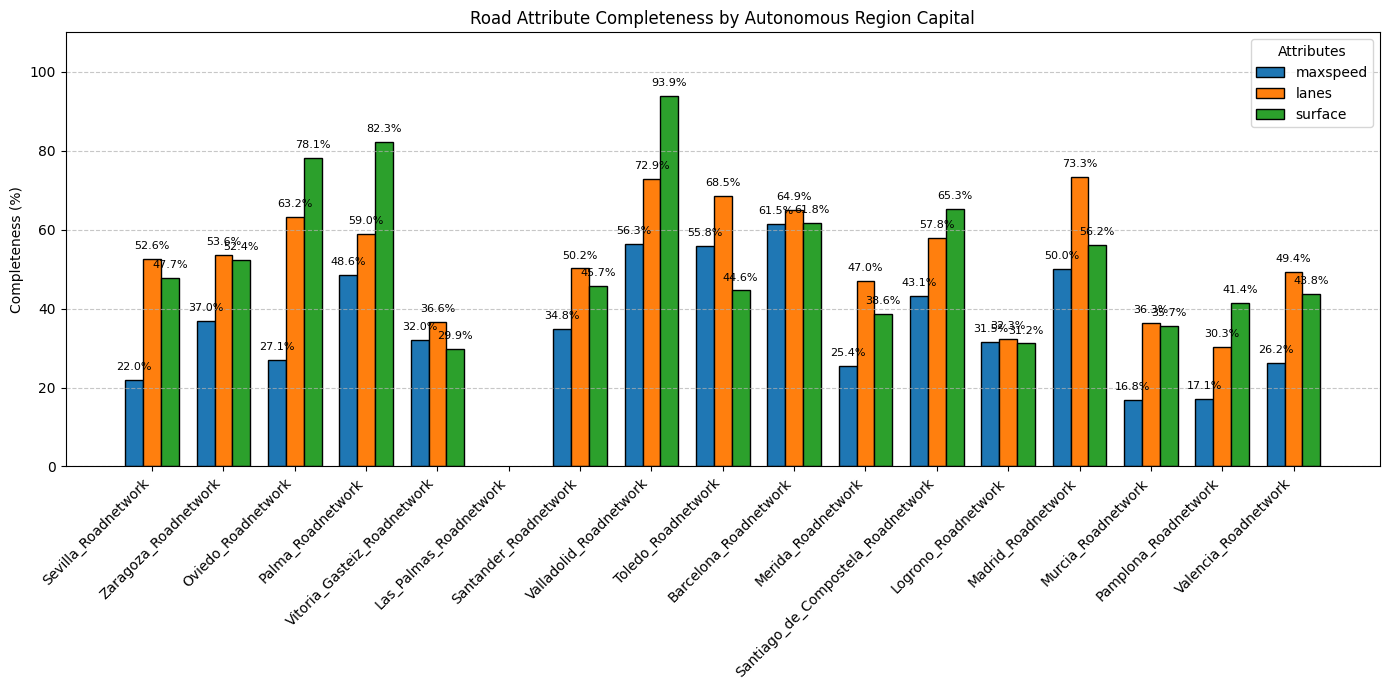

In [ ]:
columns = ['maxspeed', 'lanes', 'surface']

# Prepare data for all cities
data = {city: gdf[columns].notnull().mean() * 100 for city, gdf in roadnetworks.items()}
df_completeness = pd.DataFrame(data).T  # cities as rows, columns as attributes

# Plot setup
fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.25
indices = np.arange(len(df_completeness))

# Plot bars for each column with offset
for i, col in enumerate(columns):
    ax.bar(indices + i * bar_width, df_completeness[col], width=bar_width, label=col, edgecolor='black')

# Labels and formatting
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(df_completeness.index, rotation=45, ha='right')
ax.set_ylim(0, 110)
ax.set_ylabel('Completeness (%)')
ax.set_title('Road Attribute Completeness by Autonomous Region Capital')
ax.legend(title='Attributes')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i in range(len(df_completeness)):
    for j, col in enumerate(columns):
        val = df_completeness.iloc[i, j]
        ax.text(i + j * bar_width, val + 2, f'{val:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()